In [1]:
import PIL
import numpy as np
import rasterio as rio

In [2]:
# Path to your Sentinel-2 JP2 band
jp2_path = "S2C_OPER_MSI_L1B_GR_2CPS_20250724T031325_S20250724T004545_D11_B01.jp2"  # e.g., Band 4 (Red)

# Open with rasterio
with rio.open(jp2_path) as src:
    band = src.read(1)  # Read first band
    profile = src.profile  # Metadata (optional)

/srv/conda/envs/notebook/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [3]:
#!conda install -c conda-forge libgdal-jp2openjpeg -y

In [4]:
import matplotlib.pyplot as plt

/srv/conda/envs/notebook/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


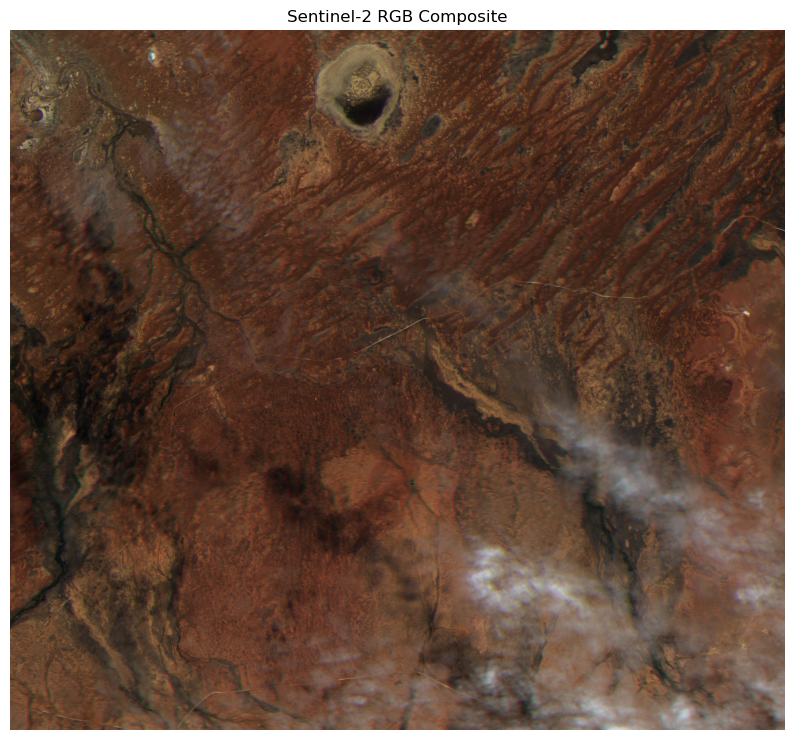

In [5]:
import numpy as np

# Paths to Red, Green, Blue bands
red_path = "S2C_OPER_MSI_L1B_GR_2CPS_20250724T031325_S20250724T004545_D11_B04.jp2"
green_path = "S2C_OPER_MSI_L1B_GR_2CPS_20250724T031325_S20250724T004545_D11_B03.jp2"
blue_path = "S2C_OPER_MSI_L1B_GR_2CPS_20250724T031325_S20250724T004545_D11_B02.jp2"

with rio.open(red_path) as red_src:
    red = red_src.read(1).astype(float)

with rio.open(green_path) as green_src:
    green = green_src.read(1).astype(float)

with rio.open(blue_path) as blue_src:
    blue = blue_src.read(1).astype(float)

# Normalize to 0–1 for display
def normalize(band):
    return (band - band.min()) / (band.max() - band.min())

rgb = np.dstack((normalize(red), normalize(green), normalize(blue)))

plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('Sentinel-2 RGB Composite')
plt.axis('off')
plt.show()

In [6]:
## Data taken from S2A_OPER_MSI_L1B_GR_2APS_20250724T011636_S20250724T000503_D02_N05.11/Inventory_Metadata.xml
p0 = (-28.6174981887976, 150.348660667886)
p1 = (-28.8297718049537, 150.289721881299)
p2 = (-28.8772947891393, 150.557398372806)
p3 = (-28.6649441614133, 150.615790641699)
p4 = (-28.6174981887976, 150.348660667886)

Text(0, 0.5, 'LATITUDE')

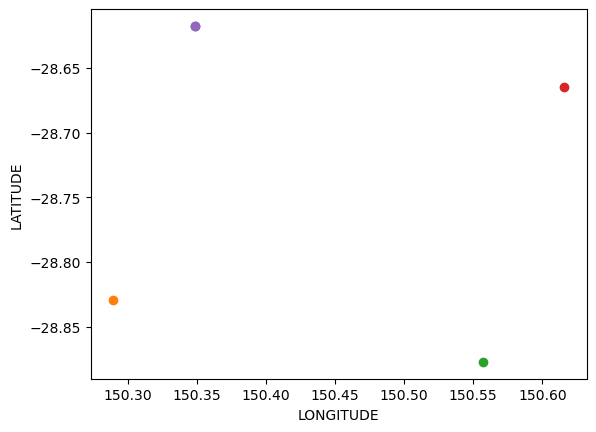

In [9]:
plt.scatter(*reversed(p0))
plt.scatter(*reversed(p1))
plt.scatter(*reversed(p2))
plt.scatter(*reversed(p3))
plt.scatter(*reversed(p4))
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")

In [16]:
p0 == p4

True